In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/DATA/"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(path + "RSCCASN.csv",parse_dates=True,index_col='DATE')

In [5]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [7]:
df.columns = ['SALES']

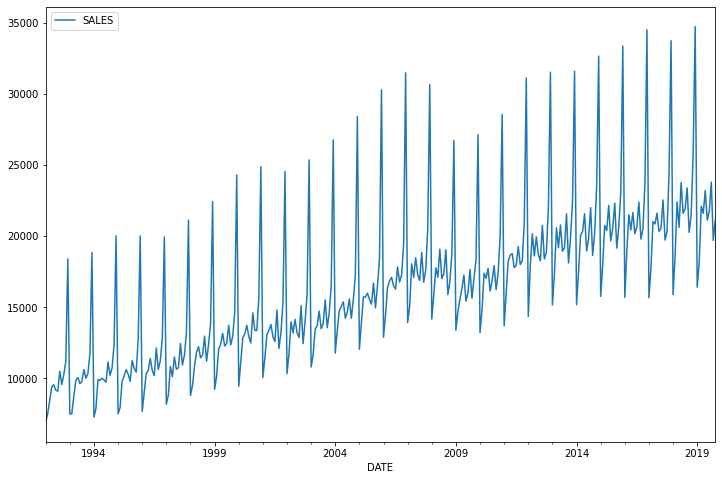

In [8]:
df.plot(figsize=(12,8))

In [9]:
len(df)

334

In [10]:
len(df) - 18

316

In [11]:
test_size = 18
test_ind = len(df) - test_size

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [13]:
train

,SALES
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [14]:
test

,SALES
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
scaled_train = scaler.transform(train)

In [19]:
scaled_test = scaler.transform(test)

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
len(test)

18

In [22]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [23]:
X,y = generator[0]

In [24]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [25]:
y

array([[0.02047633]])

In [26]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [27]:
len(X[0])

12

In [28]:
len(y)

1

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [30]:
n_features = 1

In [31]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [35]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [36]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
304/304 [==============================] - 3s 6ms/step - loss: 0.0258 - val_loss: 0.0048
Epoch 2/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0170 - val_loss: 0.0036
Epoch 3/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0092 - val_loss: 0.0030
Epoch 4/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0054 - val_loss: 0.0034
Epoch 5/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0029 - val_loss: 3.1280e-04
Epoch 6/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 7/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0016 - val_loss: 3.0507e-04
Epoch 8/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 9/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0020 - val_loss: 0.0042


In [37]:
losses = pd.DataFrame(model.history.history)

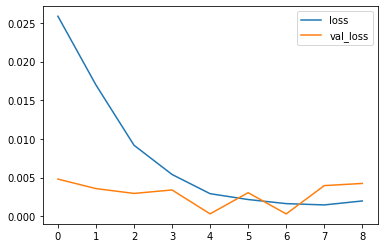

In [38]:
losses.plot()

In [39]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [40]:
true_predictions = scaler.inverse_transform(test_predictions)

In [41]:
test['predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
test

,SALES,predictions
DATE,,
2018-05-01,23764,22959.450789
2018-06-01,21589,21981.016842
2018-07-01,21919,22205.977682
2018-08-01,23381,23855.258726
2018-09-01,20260,21636.334642
2018-10-01,21473,22145.147548
2018-11-01,25831,25674.973156
2018-12-01,34706,34330.850614
2019-01-01,16410,18654.210901


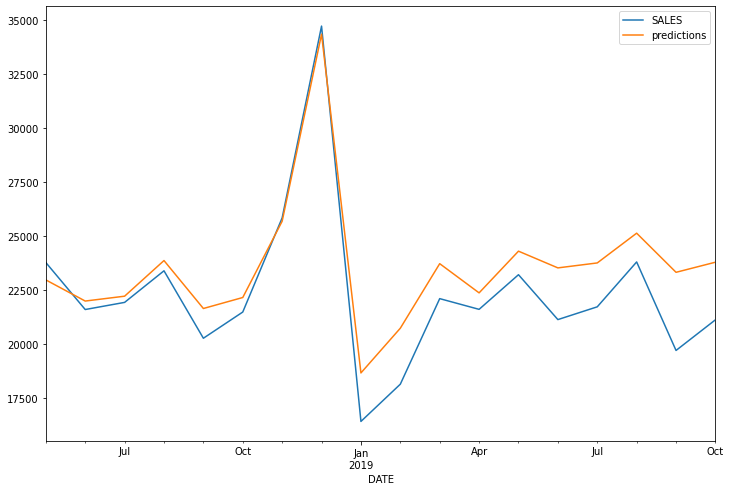

In [43]:
test.plot(figsize=(12,8))

In [44]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [45]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [46]:
model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit_generator(generator,epochs=11)

Epoch 1/11


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


322/322 [==============================] - 3s 5ms/step - loss: 0.0228
Epoch 2/11
322/322 [==============================] - 2s 5ms/step - loss: 0.0165
Epoch 3/11
322/322 [==============================] - 2s 5ms/step - loss: 0.0099
Epoch 4/11
322/322 [==============================] - 2s 5ms/step - loss: 0.0042
Epoch 5/11
322/322 [==============================] - 2s 5ms/step - loss: 0.0018
Epoch 6/11
322/322 [==============================] - 2s 5ms/step - loss: 0.0019
Epoch 7/11
322/322 [==============================] - 2s 5ms/step - loss: 0.0017
Epoch 8/11
322/322 [==============================] - 2s 5ms/step - loss: 0.0018
Epoch 9/11
322/322 [==============================] - 2s 5ms/step - loss: 0.0022
Epoch 10/11
322/322 [==============================] - 2s 5ms/step - loss: 0.0013
Epoch 11/11
322/322 [==============================] - 2s 5ms/step - loss: 0.0012


In [49]:
forecast = []
periods = 12

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [50]:
forecast = scaler.inverse_transform(forecast)

In [51]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq="MS")

In [52]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

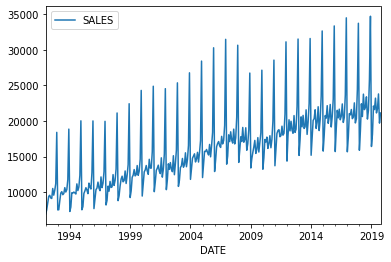

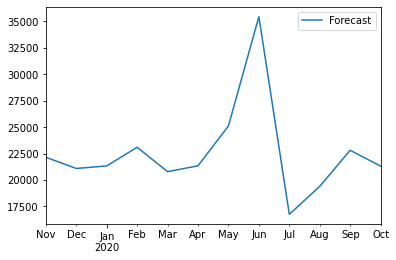

In [53]:
df.plot()
forecast_df.plot()

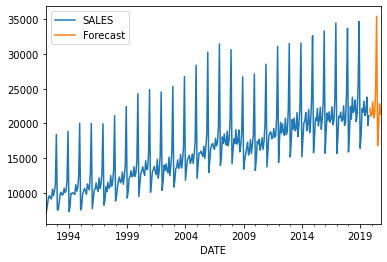

In [54]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

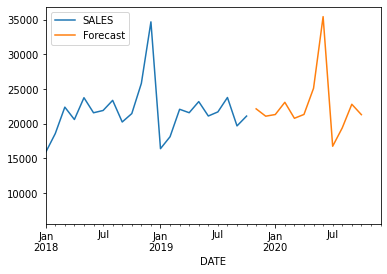

In [55]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')